In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'axes.linewidth': 1.2,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'savefig.format': 'png',
    'savefig.bbox': 'tight',
    'font.family': 'Times New Roman',
    'text.usetex': False
})

In [3]:
lstm = pd.read_csv("../models/lstm/lstm_predictions.csv")
lstm.head()

DATE        EV      WQEV    WQMGEV
0   8/23/2016  6.562248  7.432892  6.745247
1   9/12/2016  5.121693  6.663954  5.676876
2   12/1/2016  1.333822  5.461903  5.029943
3  12/21/2016  1.366752  1.364518  1.162341
4  12/31/2016  1.140757  1.666799  1.498404

In [4]:
bolstm = pd.read_csv("../models/bolstm/bolstm_predictions.csv")
bolstm.head()

DATE        EV      WQEV    WQMGEV
0   8/23/2016  6.562248  7.258184  6.664568
1   9/12/2016  5.121693  5.655594  4.298963
2   12/1/2016  1.333822  4.071841  1.929978
3  12/21/2016  1.366752  0.763052  1.170905
4  12/31/2016  1.140757  1.328744  1.263597

In [5]:
gru = pd.read_csv("../models/gru/gru_predictions.csv")
gru.head()

DATE        EV      WQEV    WQMGEV
0   8/23/2016  6.562248  7.484390  6.846831
1   9/12/2016  5.121693  6.510322  5.786075
2   12/1/2016  1.333822  5.297688  4.812537
3  12/21/2016  1.366752  1.428586  0.991425
4  12/31/2016  1.140757  1.455441  1.176014

In [6]:
bogru = pd.read_csv("../models/bogru/bogru_predictions.csv")
bogru.head()

DATE        EV      WQEV    WQMGEV
0   8/23/2016  6.562248  7.268462  6.853868
1   9/12/2016  5.121693  6.335850  5.538174
2   12/1/2016  1.333822  5.433517  4.224401
3  12/21/2016  1.366752  1.245891  1.249798
4  12/31/2016  1.140757  0.875852  1.777381

In [7]:
def mean_bias_error(y_obs, y_pred):
    return np.mean(y_pred - y_obs)

In [8]:
def metrics(data, y):
    obs = data["EV"]
    pred = data[y]
    # Metrics
    mae = mean_absolute_error(obs, pred)
    rmse = np.sqrt(mean_squared_error(obs, pred))
    mbe = mean_bias_error(obs, pred)
    r2 = r2_score(obs, pred)
    
    return r2, mae, rmse, mbe

In [9]:
lstm_metrics = metrics(lstm, "WQEV")
bolstm_metrics = metrics(bolstm, "WQEV")
gru_metrics = metrics(gru, "WQEV")
bogru_metrics = metrics(bogru, "WQEV")

In [10]:
y = lstm['EV']
x1 = lstm['WQEV']
x2 = bolstm['WQEV']
x3 = gru['WQEV']
x4 = bogru['WQEV']

In [11]:
# List of models and corresponding metrics
models = [
    (x1, lstm_metrics, 'LSTM'),
    (x2, bolstm_metrics, 'BO-LSTM'),
    (x3, gru_metrics, 'GRU'),
    (x4, bogru_metrics, 'BO-GRU')
]

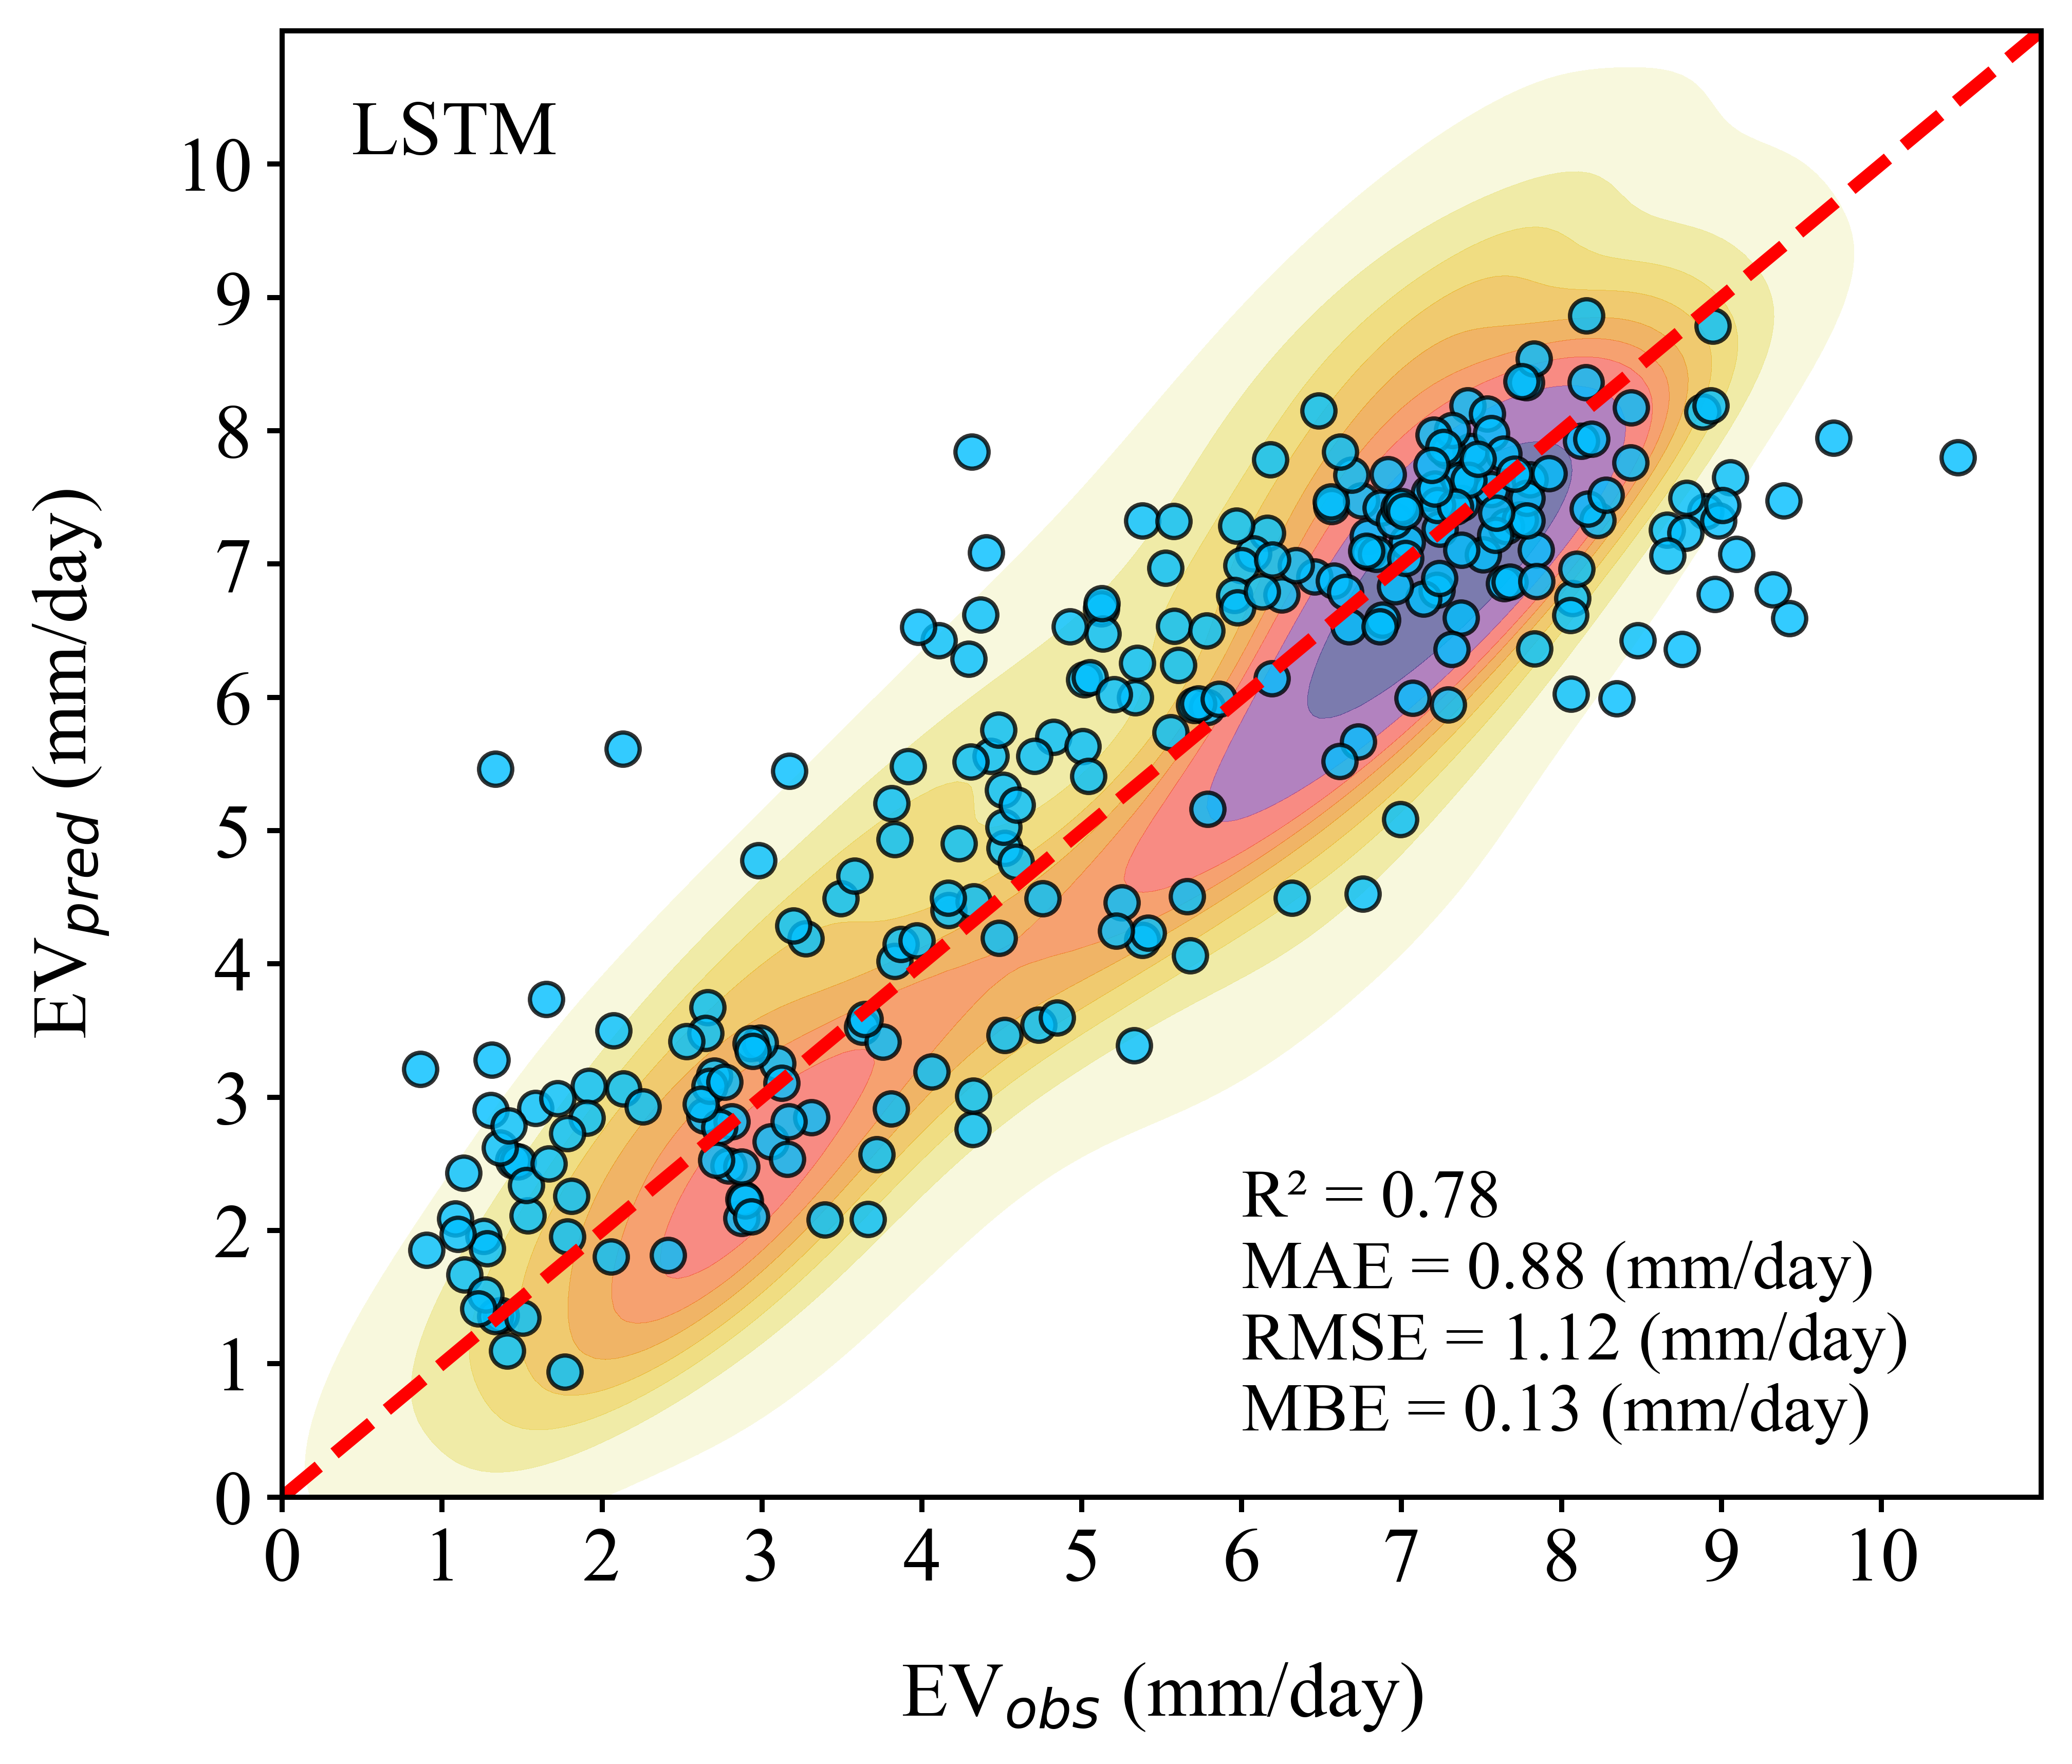

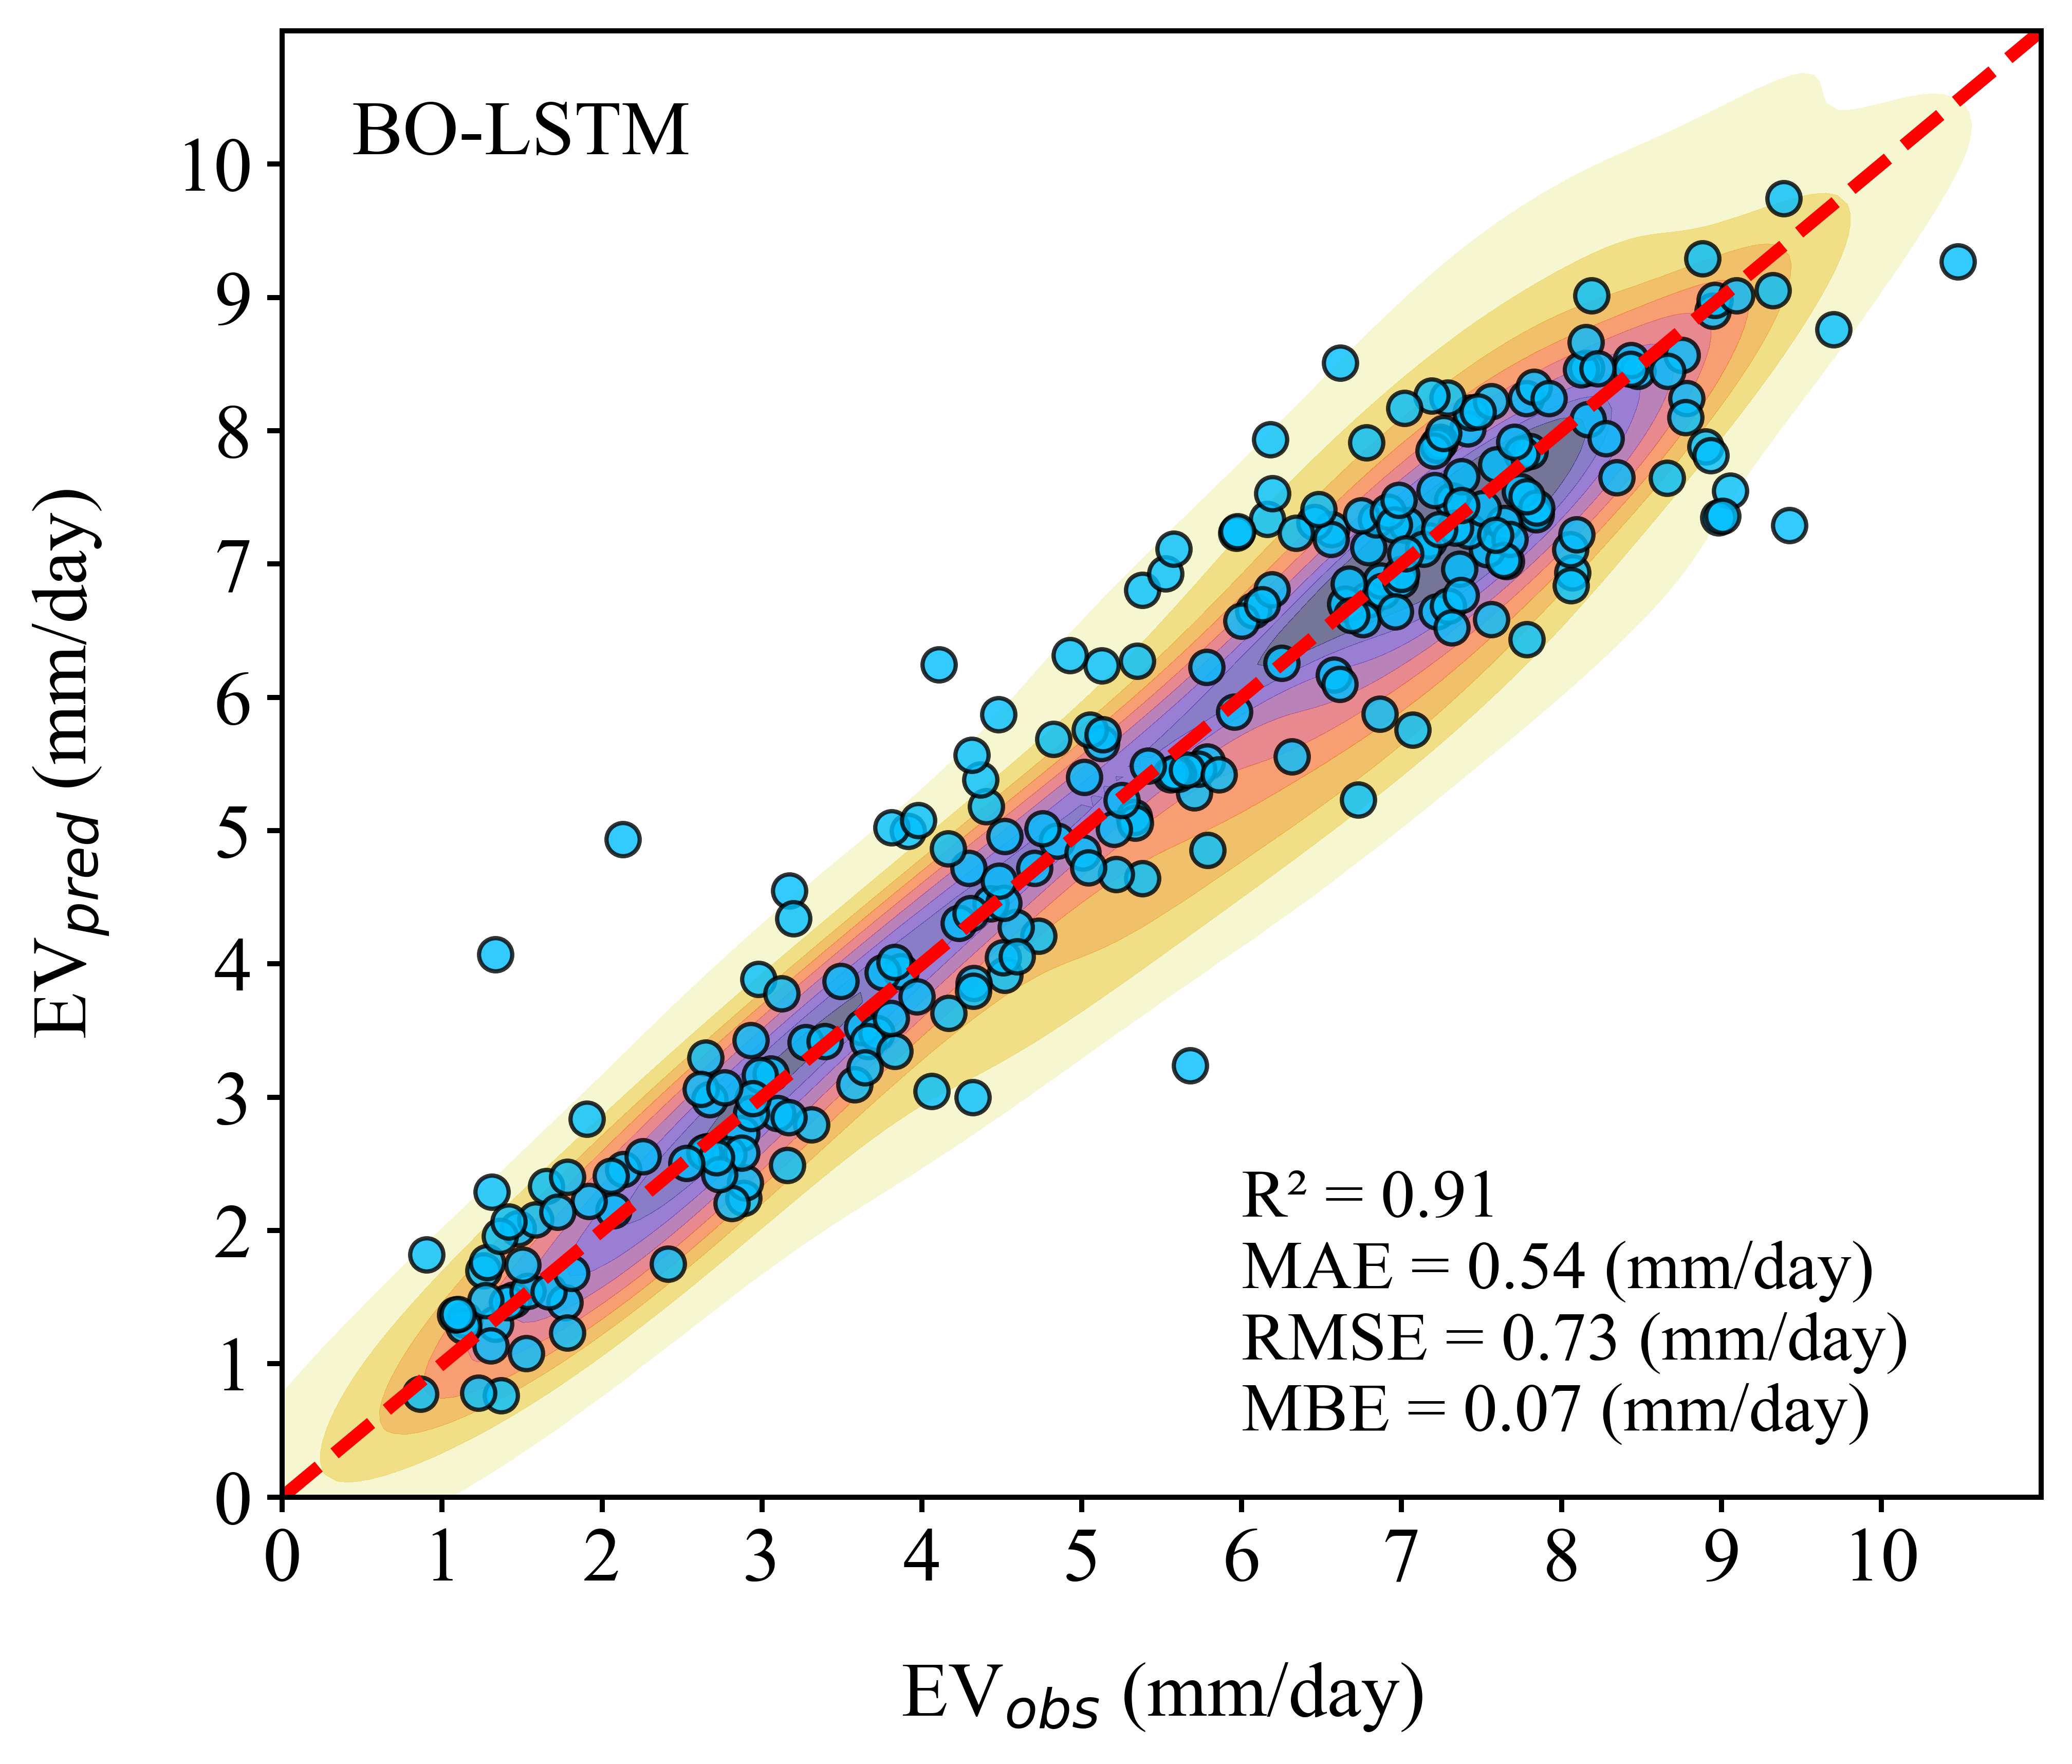

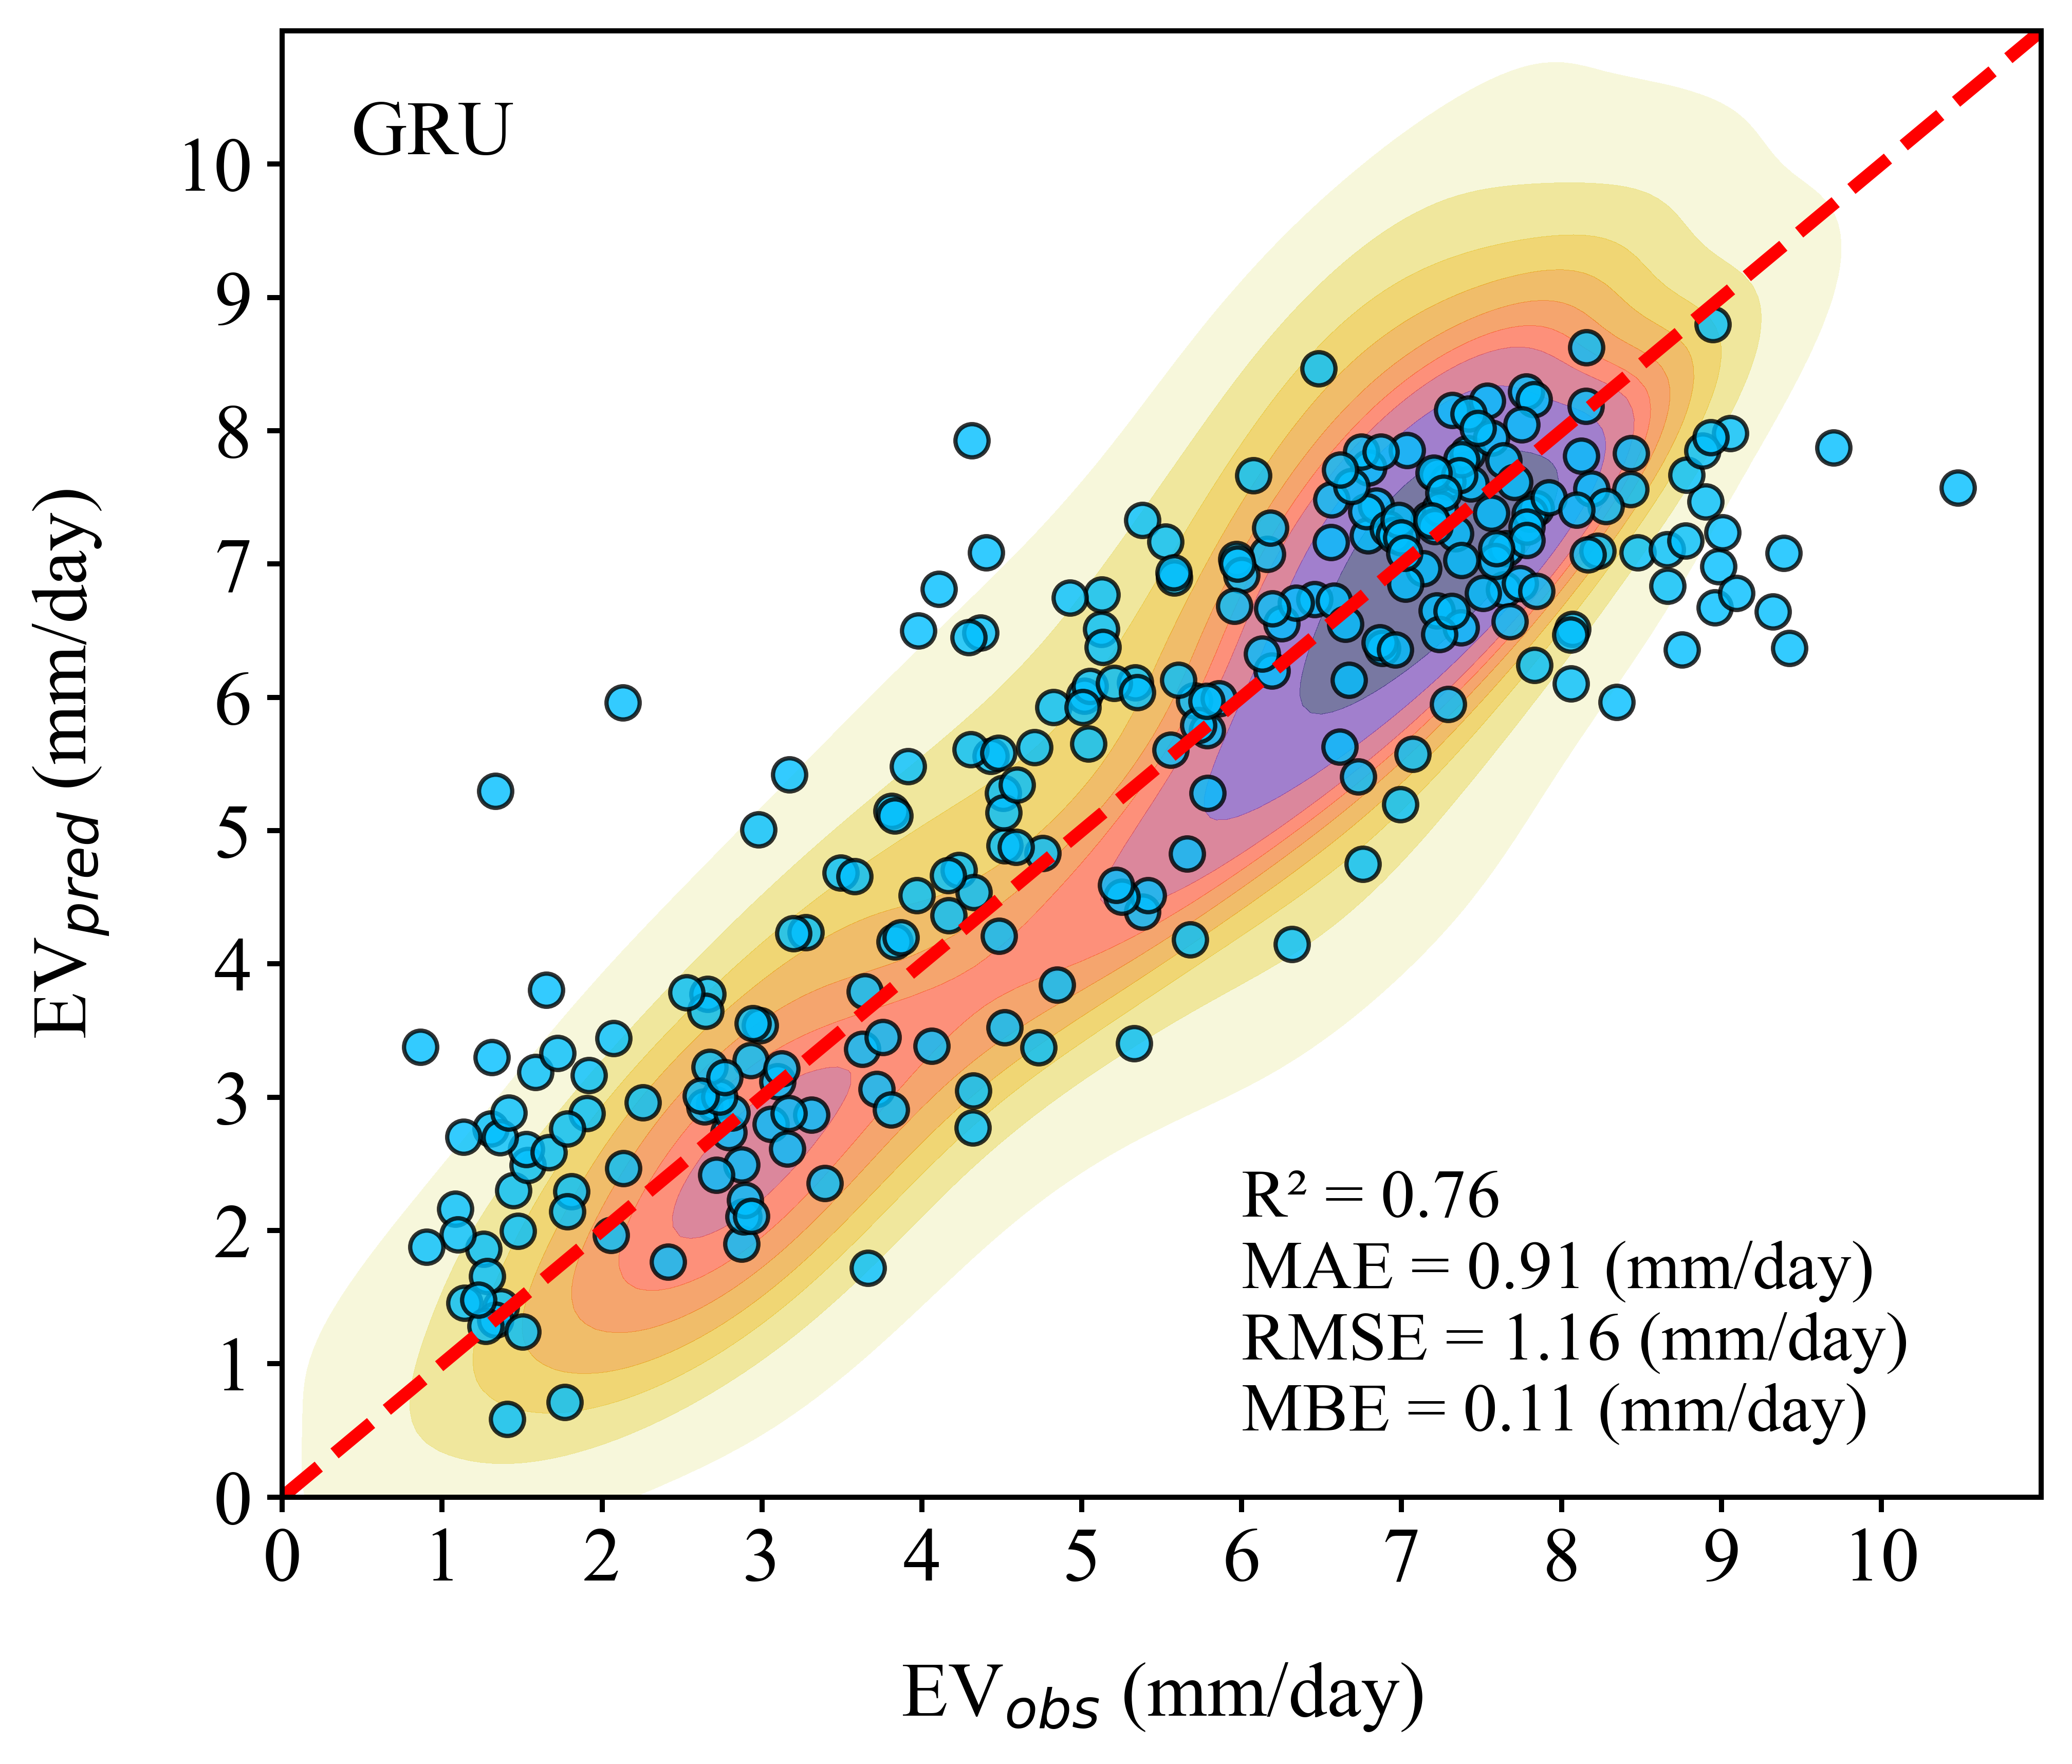

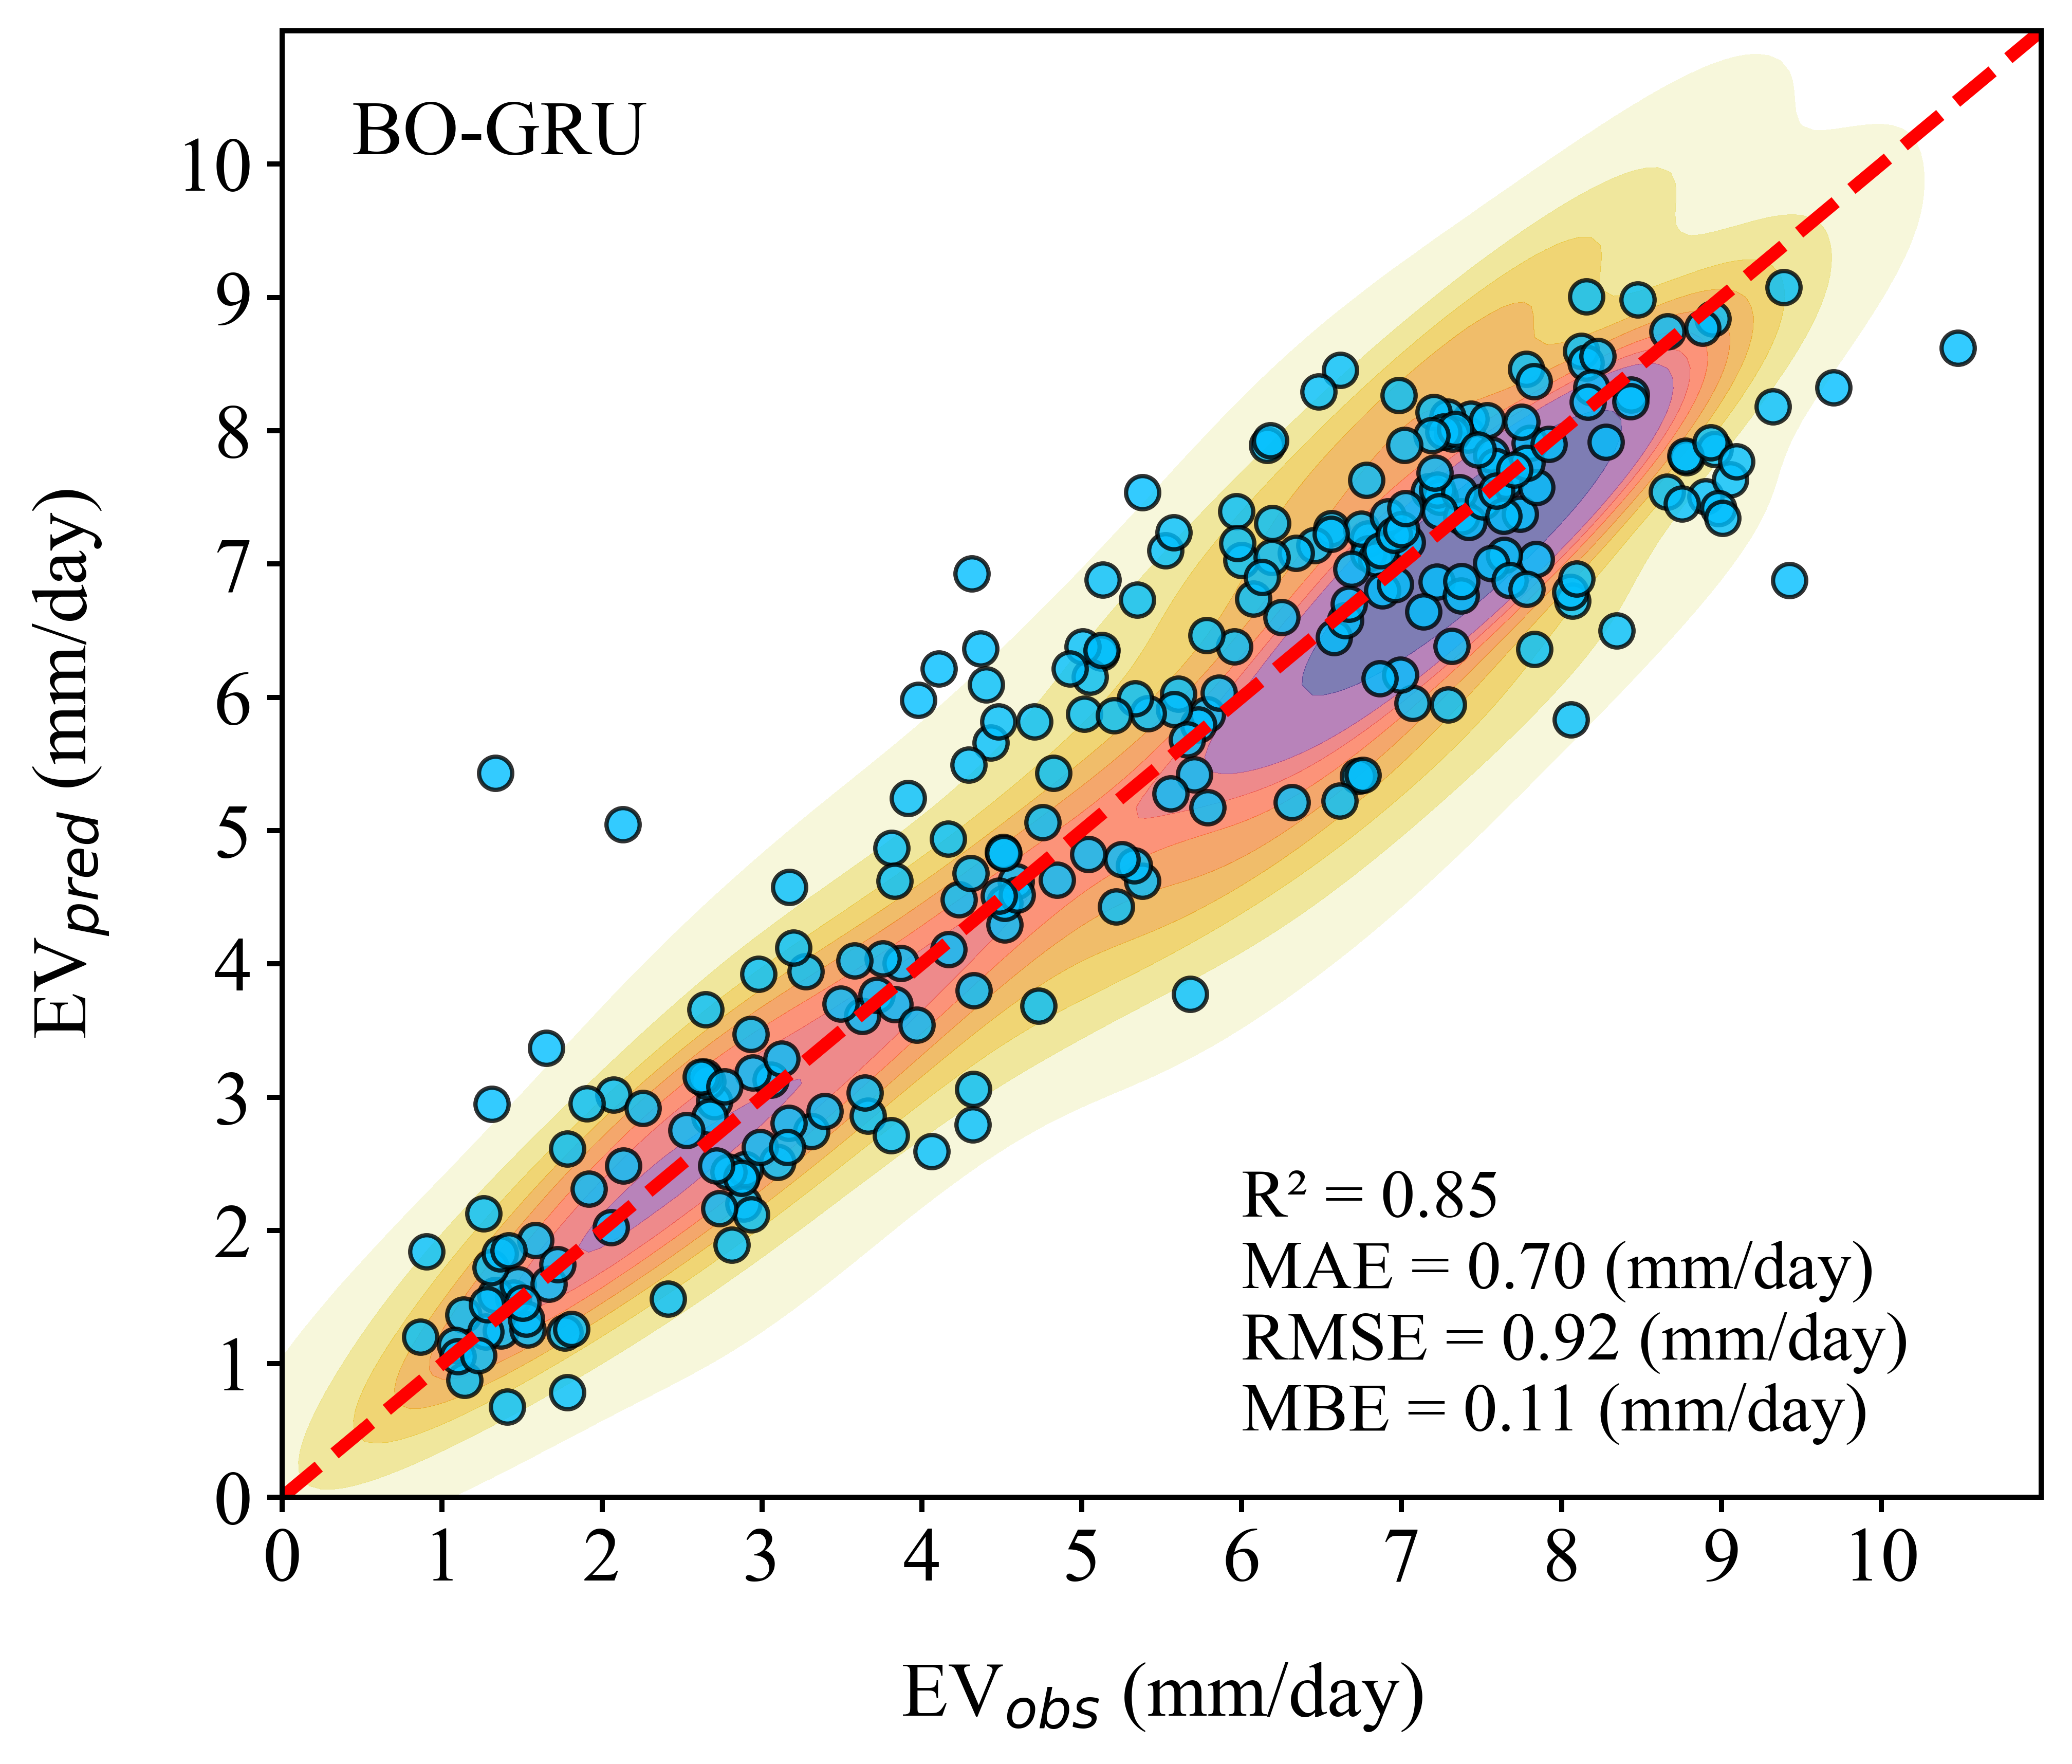

In [12]:
# Generate plots
for model, m, label in models:
    fig, ax = plt.subplots(figsize=(7, 6), dpi=600)

    sns.kdeplot(x=model, y=y, levels=10, cmap='CMRmap_r', alpha=0.6, fill=True, ax=ax)
    ax.scatter(y, model, color='deepskyblue', s=60, alpha=0.8, edgecolor='black')
    ax.plot([0, 11], [0, 11], color='red', linestyle='--', linewidth=3)
    ax.scatter([0], [0], label=label, c='white', s=0)

    # Labels with LaTeX formatting
    ax.set_xlabel(r"EV$_{obs}$ (mm/day)", fontsize=18, labelpad=15)
    ax.set_ylabel(r"EV$_{pred}$ (mm/day)", fontsize=18, labelpad=15)

    # Legend
    ax.legend(loc='upper left', fontsize=18, frameon=False, handletextpad=0.0, handlelength=0)

    # Annotate metrics
    ax.text(6, 0.5,
            f"R² = {m[0]:.2f}\nMAE = {m[1]:.2f} (mm/day)\nRMSE = {m[2]:.2f} (mm/day)\nMBE = {m[3]:.2f} (mm/day)",
            fontsize=16, color='black')

    # Axes limits and ticks
    ax.set_ylim(-0.00, 11)
    ax.set_yticks(np.arange(-0.00, 11, 1))
    ax.set_xlim(-0.00, 11)
    ax.set_xticks(np.arange(-0.00, 11, 1))

    ax.tick_params(axis='both', which='major', labelsize=18)

    plt.tight_layout()
    plt.savefig(f"./../plots/wq-{label.lower()}.png", dpi=600, bbox_inches='tight')

plt.show()